<a href="https://colab.research.google.com/github/shnrndk/IP-Cat-Research/blob/CDF-PDF/PDF_and_CDF_Create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from ast import literal_eval

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!cp  /content/drive/MyDrive/final_dataset_updated.zip /content/

In [29]:
!unzip  final_dataset_updated.zip

Archive:  final_dataset_updated.zip
replace cdn_final_final.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [215]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4['vendor']= ['vpn' for x in range(df3.shape[0])]
df4 = df4.sample(n = 9200)

df = df.append([df1,df2,df3,df4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

In [32]:
def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

In [33]:
def getgeneralphp(x):
  if (pd.isna(x)):
    return "0"
  else:
    if('PHP' in x):
      return 'PHP'

In [34]:
def changenullaszero(x):
  if (pd.isna(x)): 
    return "0"
  else:
    return "1"

In [35]:
def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

In [36]:
def arrayLiteral(stringarray):
  return len(literal_eval(stringarray))

In [37]:
def removeSquareBrackets(text):
  return literal_eval(text)[0];

In [207]:
df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(getgeneralCloudfront)
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(getgeneralCloudfront)
df['data.http.result.response.headers.via.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after.0'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location.0'] = df['data.http.result.response.headers.location.0'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.0.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag.0'] = df['data.http.result.response.headers.etag.0'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified.0']  = df['data.http.result.response.headers.last_modified.0'].apply(changenullaszero)
df['data.http.result.response.headers.vary.0'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by.0'].fillna(-1, inplace=True)
df['data.http.result.redirect_response_chain.0.headers.server.0'].fillna(-1, inplace=True)
df = df.drop(['data.http.result.redirect_response_chain.0.headers.server.0'],axis=1)
df['data.http.result.response.headers.server.0']  = df['data.http.result.response.headers.server.0'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server.0'].fillna(-1, inplace=True)

In [216]:
df['data.http.result.response.headers.server.0'] = le.fit_transform(df['data.http.result.response.headers.server.0'].astype(str))
df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
df['data.http.result.response.headers.connection.0'] = le.fit_transform(df['data.http.result.response.headers.connection.0'].astype(str))
df['data.http.result.response.headers.via.0'] = le.fit_transform(df['data.http.result.response.headers.via.0'].astype(str))
df['data.http.result.response.headers.accept_ranges.0'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges.0'].astype(str))
df['data.http.result.response.headers.cache_control.0'] = le.fit_transform(df['data.http.result.response.headers.cache_control.0'].astype(str))
df['data.http.result.response.headers.retry_after.0'] = le.fit_transform(df['data.http.result.response.headers.retry_after.0'].astype(str))
df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
df['data.http.result.response.headers.content_type.0'] = le.fit_transform(df['data.http.result.response.headers.content_type.0'].astype(str))

df['data.http.result.response.headers.location.0'] = le.fit_transform(df['data.http.result.response.headers.location.0'].astype(str))
df['data.http.result.redirect_response_chain.0.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.0.status_line'].astype(str))
df['data.http.result.response.headers.etag.0'] = le.fit_transform(df['data.http.result.response.headers.etag.0'].astype(str))
df['data.http.result.response.headers.last_modified.0'] = le.fit_transform(df['data.http.result.response.headers.last_modified.0'].astype(str))
df['data.http.result.response.headers.vary.0'] = le.fit_transform(df['data.http.result.response.headers.vary.0'].astype(str))
df['data.http.result.response.transfer_encoding.0'] = le.fit_transform(df['data.http.result.response.transfer_encoding.0'].astype(str))

df['data.http.result.response.headers.x_powered_by.0'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by.0'].astype(str))
df['data.http.result.response.headers.pragma.0'] = le.fit_transform(df['data.http.result.response.headers.pragma.0'].astype(str))
df['as_name'] = le.fit_transform(df['as_name'].astype(str))

df['as_no'] = le.fit_transform(df['as_no'].astype(str))
df['vendor'] = le.fit_transform(df['vendor'].astype(str))
vendorEncodings = le.classes_


In [167]:
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)

In [217]:
df['data.http.result.response.headers.last_modified.0']

0         6614
1         6614
2         6614
3         6614
4         6614
          ... 
114195    6614
114196    6614
114197    6614
114198    6614
114199    6614
Name: data.http.result.response.headers.last_modified.0, Length: 114200, dtype: int64

In [218]:
df["data.http.result.response.headers.last_modified.0"].value_counts()

6614    99036
5845     3114
6126      541
5843      458
5472      266
        ...  
3048        1
1001        1
5099        1
3112        1
0           1
Name: data.http.result.response.headers.last_modified.0, Length: 6615, dtype: int64

In [ ]:
df["data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization"] = df["data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization"].apply(removeSquareBrackets)

In [150]:
df = df.dropna(subset=['data.http.result.response.headers.etag.0'])

In [ ]:
df["data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization"] = df["data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization"].apply(removeSquareBrackets)

In [ ]:
df["data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province"]

3                 California
10                California
26        Edinburgh, City of
38                California
39                California
                 ...        
113321            Jawa Barat
113719              New York
113757                 Sindh
114024        Andhra Pradesh
114066            California
Name: data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province, Length: 13318, dtype: object

In [ ]:
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].value_counts()

['US']    67694
['GB']     7280
['BE']     5426
['--']      541
['JP']      388
          ...  
['jp']        1
['HU']        1
['VN']        1
['UY']        1
['mx']        1
Name: data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country, Length: 83, dtype: int64

In [ ]:
#df['netType'] = le.fit_transform(df['netType'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].astype(str))

In [ ]:
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].astype(str))

In [205]:
df['data.tls.status'] = le.fit_transform(df['data.tls.status'].astype(str))

In [ ]:
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province']

3          62
10         62
26         97
38         62
39         62
         ... 
113321    171
113719    268
113757    359
114024     19
114066     62
Name: data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province, Length: 13318, dtype: int64

In [ ]:
df['as_name']

0          5
1          5
2         24
3         43
4          5
          ..
104995     6
104996     6
104997     5
104998     6
104999     6
Name: as_name, Length: 105000, dtype: int64

In [ ]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
       'data.http.result.redirect_response_chain.0.status_line',
       'data.http.result.response.headers.etag.0',
       'data.http.result.response.headers.last_modified.0',
       'data.http.result.response.headers.vary.0',
       'data.htt

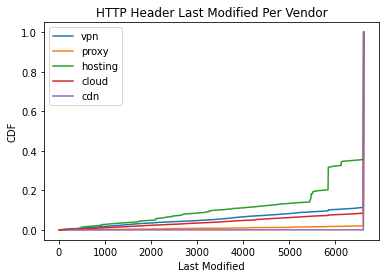

In [228]:
count, bins_count  = np.histogram(df[df["vendor"] == 4]['data.http.result.response.headers.last_modified.0'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[4])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 3]['data.http.result.response.headers.last_modified.0'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[3])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 2]['data.http.result.response.headers.last_modified.0'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[2])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 1]['data.http.result.response.headers.last_modified.0'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[1])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 0]['data.http.result.response.headers.last_modified.0'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[0])
plt.legend()
plt.title('HTTP Header Last Modified Per Vendor')
plt.ylabel('CDF')
plt.xlabel('Last Modified')
plt.savefig('HTTP Header Last Modified Per Vendor.png')

No handles with labels found to put in legend.


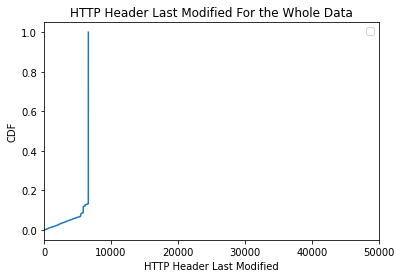

In [227]:
count, bins_count  = np.histogram(df['data.http.result.response.headers.last_modified.0'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf)
plt.legend()
plt.title('HTTP Header Last Modified For the Whole Data')
plt.ylabel('CDF')
plt.xlabel('HTTP Header Last Modified')
plt.xlim(0,50000)
plt.savefig('HTTP Header Last Modified Whole.png')

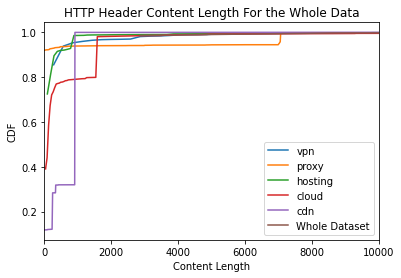

In [113]:
count, bins_count  = np.histogram(df[df["vendor"] == 4]['data.http.result.response.content_length'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[4])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 3]['data.http.result.response.content_length'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[3])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 2]['data.http.result.response.content_length'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[2])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 1]['data.http.result.response.content_length'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[1])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 0]['data.http.result.response.content_length'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[0])
plt.legend()
plt.title('CDF of No of Whois Records Per Vendor')
plt.ylabel('CDF')
plt.xlabel('# of Whois Records')

count, bins_count  = np.histogram(df['data.http.result.response.content_length'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label = "Whole Dataset")
plt.legend()
plt.title('HTTP Header Content Length For the Whole Data')
plt.ylabel('CDF')
plt.xlabel('Content Length')
plt.xlim(0,10000)
plt.savefig('HTTP Content Length Merged.png')

In [ ]:
le.classes_

array(['Allocated to APNIC', 'Allocated to AfriNIC',
       'Allocated to LACNIC', 'Allocated to RIPE NCC',
       'Direct Allocation', 'Direct Assignment',
       'Early Registrations, Maintained by APNIC',
       'Early Registrations, Maintained by RIPE NCC',
       'Early Registrations, Transferred to APNIC',
       'Early Registrations, Transferred to RIPE NCC', 'Reallocated',
       'Reassigned', 'Transferred to AfriNIC', 'Transferred to LACNIC'],
      dtype=object)

In [ ]:
vendorEncodings

array(['cdn', 'cloud', 'hosting', 'proxy', 'vpn'], dtype=object)

In [ ]:
le.classes_

array(['Allocated to APNIC', 'Allocated to AfriNIC',
       'Allocated to LACNIC', 'Allocated to RIPE NCC',
       'Direct Allocation', 'Direct Assignment',
       'Early Registrations, Maintained by APNIC',
       'Early Registrations, Maintained by RIPE NCC',
       'Early Registrations, Transferred to APNIC',
       'Early Registrations, Transferred to RIPE NCC', 'Reallocated',
       'Reassigned', 'Transferred to AfriNIC', 'Transferred to LACNIC'],
      dtype=object)

In [ ]:
x = []
i=0
while(i<len(le.classes_)):
  x.append(i)
  i=i+1

In [ ]:
x

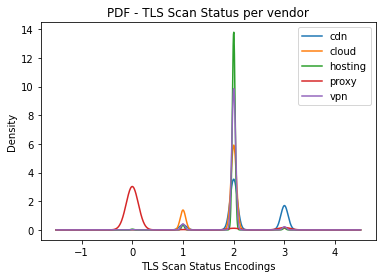

In [212]:
df[df["vendor"] == 0]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size',label=vendorEncodings[0])
df[df["vendor"] == 1]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size',label=vendorEncodings[1])
df[df["vendor"] == 2]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size ',label=vendorEncodings[2])
df[df["vendor"] == 3]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size',label=vendorEncodings[3])
df[df["vendor"] == 4]['data.tls.status'].plot.kde(title='PDF - TLS Scan Status per vendor',label=vendorEncodings[4])
plt.legend(vendorEncodings)
# plt.xticks(x, le.classes_)
# plt.xticks(rotation=90)
plt.xlabel('TLS Scan Status Encodings')
plt.savefig('TLS Scan Status Vendor.png')

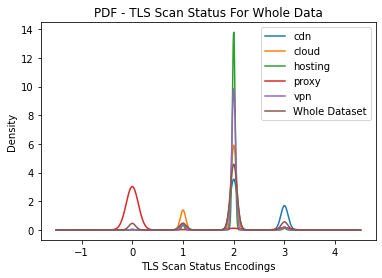

In [213]:
df[df["vendor"] == 0]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size',label=vendorEncodings[0])
df[df["vendor"] == 1]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size',label=vendorEncodings[1])
df[df["vendor"] == 2]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size ',label=vendorEncodings[2])
df[df["vendor"] == 3]['data.tls.status'].plot.kde(title='PDF - Whois CIDR Block Size',label=vendorEncodings[3])
df[df["vendor"] == 4]['data.tls.status'].plot.kde(title='PDF - Certificate Issuer Organisation For Whole Data',label=vendorEncodings[4])
df['data.tls.status'].plot.kde(title='PDF - TLS Scan Status For Whole Data')
plt.legend(np.append(vendorEncodings,("Whole Dataset")))
# plt.xticks(x, le.classes_)
# plt.xticks(rotation=90)
plt.xlabel('TLS Scan Status Encodings')
plt.savefig('TLS Scan Status Merged.png')

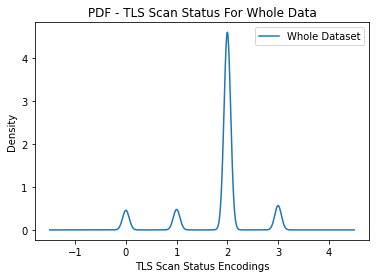

In [214]:
df['data.tls.status'].plot.kde(title='PDF - TLS Scan Status For Whole Data')
plt.legend(["Whole Dataset"])
#plt.xticks(x, le.classes_)
#plt.xticks(rotation=90)
#plt.xlim(-3,12)
plt.xlabel('TLS Scan Status Encodings')
plt.savefig('TLS Scan Status Whole.png')

In [ ]:
print(le.classes_[0])
df[df["vendor"] == 0]['CNAME Count'].describe()

cdn


count    18810.000000
mean         6.219351
std         17.350154
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        406.000000
Name: CNAME Count, dtype: float64

In [ ]:
print(le.classes_[1])
df[df["vendor"] == 1]['CNAME Count'].describe()

cloud


count    22623.000000
mean         2.332582
std          4.407728
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        246.000000
Name: CNAME Count, dtype: float64

In [ ]:
print(le.classes_[2])
df[df["vendor"] == 2]['CNAME Count'].describe()

hosting


count    25889.000000
mean         6.013944
std         14.357315
min          1.000000
25%          2.000000
50%          2.000000
75%          8.000000
max       2073.000000
Name: CNAME Count, dtype: float64

In [ ]:
print(le.classes_[3])
df[df["vendor"] == 3]['CNAME Count'].describe()

proxy


count    227.000000
mean       1.947137
std        2.068908
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       23.000000
Name: CNAME Count, dtype: float64

In [ ]:
print(le.classes_[4])
df[df["vendor"] == 4]['CNAME Count'].describe()

vpn


count    13106.000000
mean         2.598199
std          7.267821
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        246.000000
Name: CNAME Count, dtype: float64

In [ ]:
print("Whole")
df['CNAME Count'].describe()

Whole


count    80655.000000
mean         4.462774
std         12.399856
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       2073.000000
Name: CNAME Count, dtype: float64